In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# Cavity Temperature

Attempted to init fitparam 1 to 0.5, which is out of bounds 0.0006313131313131314 to 0.0946969696969697. Instead init to 0.047664141414141416
Attempted to init fitparam 4 to -59.43875953526049, which is out of bounds -295.38089128613325 to -213.2287211535332. Instead init to -254.3048062198332
Attempted to init fitparam 4 to -254.3048062198332, which is out of bounds 326.10305721911374 to 339.32673276173404. Instead init to 332.7148949904239
Current pi pulse frequency: 3568.1751638611518
Fit frequency from I [MHz]: 0.03905114388190146 +/- 0.006491272302563669
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.23611271727
 	3568.3142150050335
T2 Ramsey from fit I [us]: 47.52000000000001
Fit frequency from Q [MHz]: 0.052114568357742794 +/- 0.0013591902771122456
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.223049292794
 	3568.3272784295095
T2 Ramsey from fit Q [us]: 47.52000000000001


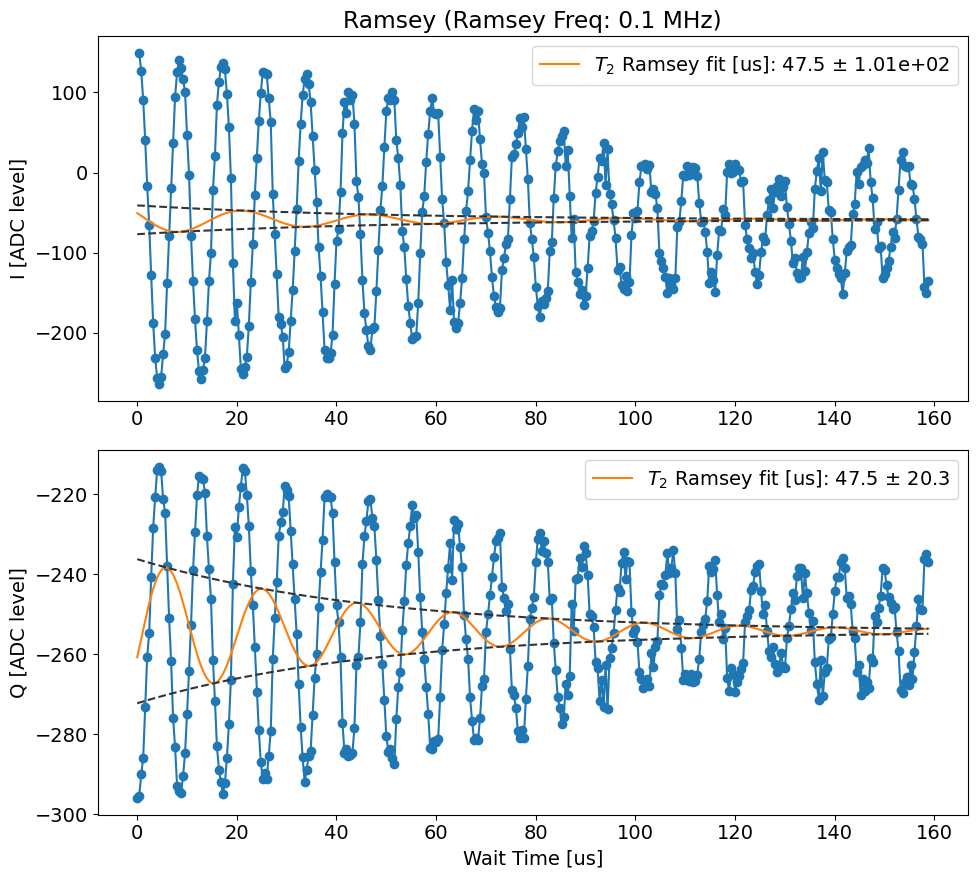

In [40]:
temp_data, attrs = prev_data(expt_path, '00014_RamseyExperiment.h5')

t2, t2_err, xdata, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=True, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True,fitparams=[1000, 0.5, None, None, None, None],
                  return_idata = True,  title='Ramsey')

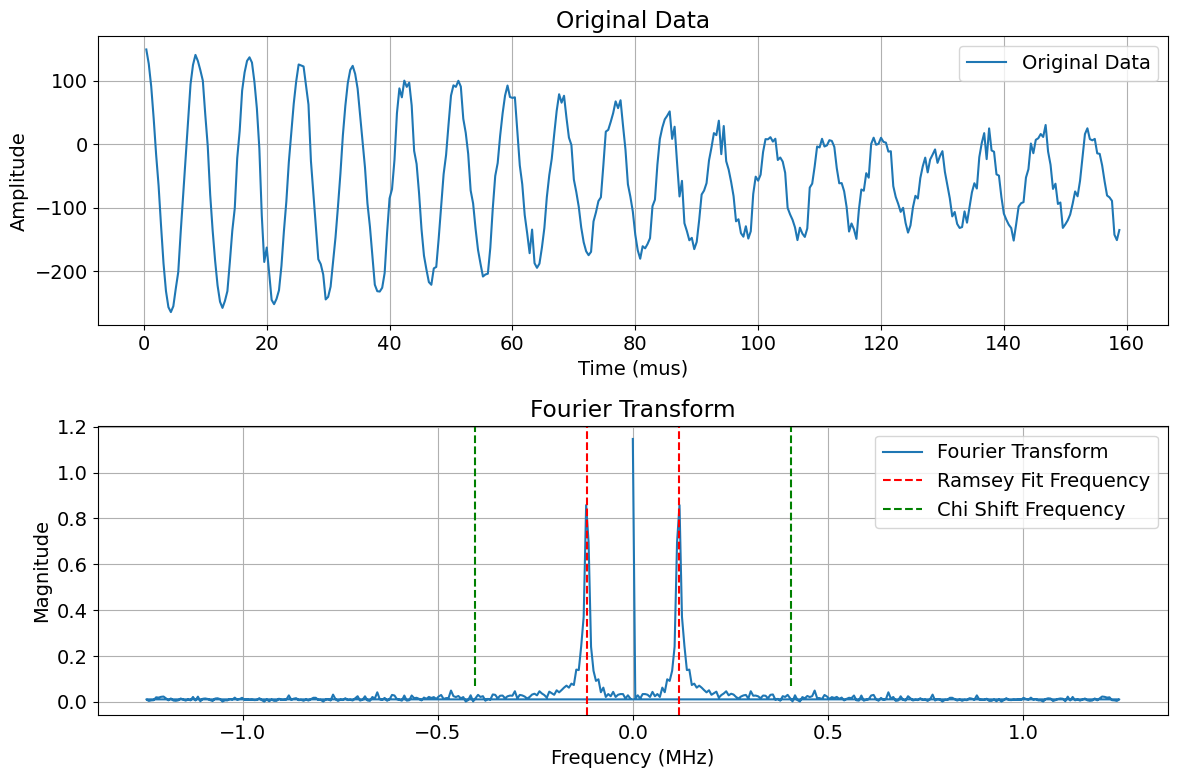

In [41]:
xdata = xdata 
ydata = idata


# Perform Fourier transform
ydata_fft = np.fft.fft(ydata)
frequencies = np.fft.fftfreq(len(ydata), d=(xdata[1] - xdata[0]))

# Plot the original data
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(xdata, ydata, label='Original Data')
plt.xlabel('Time (mus)')
plt.ylabel('Amplitude')
plt.title('Original Data')
plt.legend()
plt.grid(True)

# Plot the Fourier transform
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(ydata_fft) / max(ydata_fft), label='Fourier Transform')

ramsey_fit_freq = 0.118 #0.21797037655105334
plt.axvline(x=ramsey_fit_freq, color='red', linestyle='--', label='Ramsey Fit Frequency')
plt.axvline(x=-ramsey_fit_freq, color='red', linestyle='--')

chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][1])
chi_shift_ramsey_freq = ramsey_fit_freq + chi

plt.axvline(x=chi_shift_ramsey_freq, color='green', linestyle='--', label='Chi Shift Frequency', ymin = 0.1)
plt.axvline(x=-chi_shift_ramsey_freq, color='green', linestyle='--', ymin=0.1)


plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
